<a href="https://colab.research.google.com/github/daivik05/Cereal_plant_disease_classification_with_severity_scoring_and_treatment_recommendation/blob/main/Copy_of_plant2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , auc
from sklearn.model_selection import train_test_split

import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub

from keras.applications import MobileNetV2
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D
!pip install tensorflow

In [2]:
repo_name = 'Cereal_plant_disease_classification_with_severity_scoring_and_treatment_recommendation'
repo_url = f'https://github.com/daivik05/Cereal_plant_disease_classification_with_severity_scoring_and_treatment_recommendation'  # Replace your_username
!git clone $repo_url


Cloning into 'Cereal_plant_disease_classification_with_severity_scoring_and_treatment_recommendation'...
remote: Enumerating objects: 4742, done.
remote: Total 4742 (delta 0), reused 0 (delta 0), pack-reused 4742
Receiving objects: 100% (4742/4742), 1.60 GiB | 16.18 MiB/s, done.
Resolving deltas: 100% (20/20), done.
Updating files: 100% (4720/4720), done.


In [3]:
project_dir = f'/content/{repo_name}'
%cd $project_dir

/content/Cereal_plant_disease_classification_with_severity_scoring_and_treatment_recommendation


In [4]:
train_path = 'train/'

In [5]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
 train_path,
    batch_size=256,
  image_size=(224,224), shuffle=True
)

Found 4715 files belonging to 10 classes.


In [6]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [7]:
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # or 'binary' depending on your task
    subset='training'
)


Found 3775 images belonging to 10 classes.


In [8]:
for img, label in train_generator:
    print("Training Batch Shapes:", img.shape, label.shape)
    break

Training Batch Shapes: (32, 224, 224, 3) (32, 10)


In [9]:
train_generator.class_indices

{'corn_Blight': 0,
 'corn_Common_Rust': 1,
 'corn_Gray_Leaf_Spot': 2,
 'corn_Healthy': 3,
 'rice_Bacterial leaf blight': 4,
 'rice_Brown spot': 5,
 'rice_Leaf smut': 6,
 'wheat_leaf_Healthy': 7,
 'wheat_leaf_septoria': 8,
 'wheat_leaf_stripe_rust': 9}

In [10]:
len(train_data.class_names)

10

In [11]:
class_labels = train_data.class_names
class_labels

['corn_Blight',
 'corn_Common_Rust',
 'corn_Gray_Leaf_Spot',
 'corn_Healthy',
 'rice_Bacterial leaf blight',
 'rice_Brown spot',
 'rice_Leaf smut',
 'wheat_leaf_Healthy',
 'wheat_leaf_septoria',
 'wheat_leaf_stripe_rust']

In [23]:
for img, label in train_generator:
    #print(img)
    print(label)
    break

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0.

In [13]:
label[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
len(class_labels)

10

In [38]:
from tensorflow.keras.layers import Concatenate, GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Define input layer for the image
input_image = Input(shape=(224, 224, 3), name='input_image')

# Pass the image through the base model for feature extraction
base_features = base_model(input_image)
pooled_features = GlobalAveragePooling2D()(base_features)

# Classification branch
classification_output = Dense(100, activation='relu')(pooled_features)
classification_output = Dense(100, activation='relu')(classification_output)

# Calculate the number of classes based on the class indices in train_generator
num_classes = len(train_generator.class_indices)

# Update the classification output layer to match the number of classes
classification_output = Dense(num_classes, activation='softmax', name='classification_output')(classification_output)

# Percentage estimation branch
# Percentage estimation branch
percentage_output = Dense(100, activation='relu')(pooled_features)
percentage_output = Dense(100, activation='relu')(percentage_output)
percentage_output = Dense(100, activation='linear', name='percentage_output')(percentage_output)

# Concatenate the outputs of both branches
combined_output = Concatenate()([classification_output, percentage_output])

# Create the combined model
combined_model = Model(inputs=input_image, outputs=combined_output)

# Compile the combined model
combined_model.compile(optimizer='adam',
                       loss=['sparse_categorical_crossentropy', 'binary_crossentropy'],  # Define losses for classification and percentage estimation
                       loss_weights=[1.0, 0.5],  # Adjust loss weights as needed
                       metrics=['accuracy'])

# Display the model summary
combined_model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_image (InputLayer)    [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)           2257984   ['input_image[0][0]']         
 tional)                                                                                          
                                                                                                  
 global_average_pooling2d_5  (None, 1280)                 0         ['mobilenetv2_1.00_224[0][0]']
  (GlobalAveragePooling2D)                                                                        
                                                                                            

In [39]:
# Define data generators
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',  # Use 'sparse' for sparse categorical cross-entropy
    subset='training'
)

# Calculate the number of classes based on the class indices in train_generator
num_classes = len(train_generator.class_indices)

# Update the classification output layer to match the number of classes
classification_output = Dense(num_classes, activation='softmax', name='classification_output')(classification_output)

# Compile the combined model
combined_model.compile(optimizer='adam',
                       loss=['sparse_categorical_crossentropy', 'binary_crossentropy'],
                       loss_weights=[1.0, 0.5],
                       metrics=['accuracy'])

# Train the combined model
history = combined_model.fit(
    train_generator,
    epochs=7,
    verbose=1
)


Found 3775 images belonging to 10 classes.
Epoch 1/7
118/118 [==============================] - 95s 775ms/step - loss: 0.6959 - accuracy: 0.8048
Epoch 2/7
118/118 [==============================] - 100s 848ms/step - loss: 0.2372 - accuracy: 0.9094
Epoch 3/7
118/118 [==============================] - 94s 797ms/step - loss: 0.1990 - accuracy: 0.9221
Epoch 4/7
118/118 [==============================] - 97s 819ms/step - loss: 0.1707 - accuracy: 0.9314
Epoch 5/7
118/118 [==============================] - 95s 805ms/step - loss: 0.1518 - accuracy: 0.9399
Epoch 6/7
118/118 [==============================] - 90s 760ms/step - loss: 0.1438 - accuracy: 0.9423
Epoch 7/7
118/118 [==============================] - 90s 767ms/step - loss: 0.1221 - accuracy: 0.9526


In [45]:
combined_model.save("plant_disease_2.h5")

In [41]:
loss,acc = combined_model.evaluate(train_generator)
print("Loss on Train data:",loss)
print("Accuracy on Train data:",acc)

118/118 [==============================] - 97s 816ms/step - loss: 0.0968 - accuracy: 0.9626
Loss on Train data: 0.09682415425777435
Accuracy on Train data: 0.9626489877700806


In [46]:
acc = history.history["accuracy"]
loss = history.history["loss"]

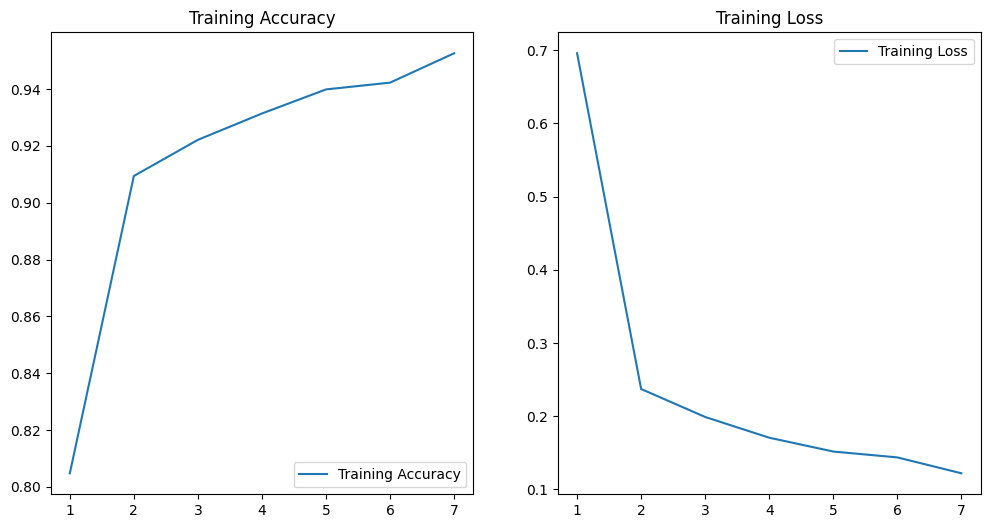

In [47]:
acc = history.history["accuracy"]
loss = history.history["loss"]

EPOCHS = len(acc)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), acc, label="Training Accuracy")
plt.legend(loc="lower right")
plt.title("Training Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), loss, label="Training Loss")
plt.legend(loc="upper right")
plt.title("Training Loss")
plt.show()


In [1]:
# Load the test image
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'train/corn_Gray_Leaf_Spot/Corn_Gray_Spot (102).JPG'  # Path to the test image
img = image.load_img(img_path, target_size=(224, 224))  # Load the image and resize it
img_array = image.img_to_array(img)  # Convert the image to a NumPy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Scale the image data

# Predict using the model
predictions = combined_model.predict(img_array)  # Provide input array for prediction
class_probabilities = predictions[0][0]  # Classification probabilities for each class
percentage_affected = predictions[0][1]  # Predicted percentage of leaf affected
percentage_affected_scaled = percentage_affected * 100

# Get the predicted crop type
predicted_crop_type = class_labels[np.argmax(class_probabilities)]

# Determine if the crop is affected based on the predicted percentage
is_affected = "Affected" if percentage_affected_scaled > 0.25 else "Not Affected"

# Print the predictions
print("Predicted Crop Type:", predicted_crop_type)
print("Affected Status:", is_affected)
print("Class Probabilities:", class_probabilities)
print("Predicted Percentage of Leaf Affected:", percentage_affected_scaled)


FileNotFoundError: [Errno 2] No such file or directory: 'train/corn_Gray_Leaf_Spot/Corn_Gray_Spot (102).JPG'